In [4]:
# clear everything
rm(list=ls())
#dev.off()
library("dbscan") #library for DBSCAN
load(file="D.RData")


In [5]:
#Create Matrix of correlation coefficient

correlation_mat<-cor(D)
standard_deviation=matrix(,1,5)
var=matrix(,1,5)
mean=matrix(,1,5)

for(i in seq(1,5)){
  standard_deviation[i]=sd(D[,i])
  var[i]=var(D[,i])
  mean[i]<-mean(D[,i])
  
}
DU<-matrix(,length(D[,1]),length(D[1,]))
DU<-D-mean

eig_cov_D<-eigen(cov(DU))
rot_D<-as.matrix(DU)%*%eig_cov_D$vectors

correlation_mat_rot=cor(rot_D)

var_rot=matrix(,1,5)
standard_deviation_rot=matrix(,1,5)
for(i in seq(1,5)){
  standard_deviation_rot[i]=sd(DU[,i])
  var_rot[i]=var(DU[,i])

}

#we can see that Feature 1 and Feature 2 are correlated (coef ~ 0.5)


In [10]:
var_rot

2.410224e+13,6.863146e+12,5.226496e+12,5.248403e+12,5.229009e+12


In [11]:
#Perform k-mean clustering
k<-8
cluster<-0

In [12]:
# REGRESSION OUTLINE ----------

  # let us see if there is the correlation coefficient

  #if we are about to build our model we should sample our data
  # the goal here is to split available data into two datasets 
  kt<-0 # this is counter for the training data set 
  kv<-0 # this is counter for the validation data set
  validationSetD<-matrix(nrow = 202, ncol = 2) # this set is for validation 
  trainingSetD<- matrix(nrow = 606, ncol = 2) # this set is for model building (training)
  
  # this is how loops (cycles) are organized in R i is the index or counter 
  for (i in seq(along=D[,1])){
    b<-(i%%4)
    if (b==0){
      kv<-kv+1
      validationSetD[kv,1]<-D[i,1]
      validationSetD[kv,2]<-D[i,2]
    } else{
      kt<-kt+1
      trainingSetD[kt,1]<-D[i,1]
      trainingSetD[kt,2]<-D[i,2]
    }
  }
  
  # let us check correlations again, we do not need to do this, consider it to be a practice 
  corCoefT=cor(trainingSetD[,1],trainingSetD[,2])
  corCoefV=cor(validationSetD[,1],validationSetD[,2])
  
  # let us try to build liner regression model
  model1 <- lm(trainingSetD[1:605,2] ~ trainingSetD[1:605,1])
  
  # let us draw corresponding trend line 
  #get(getOption("device"))() #open new graphic window
  par(mfrow=c(1,1))


  
  

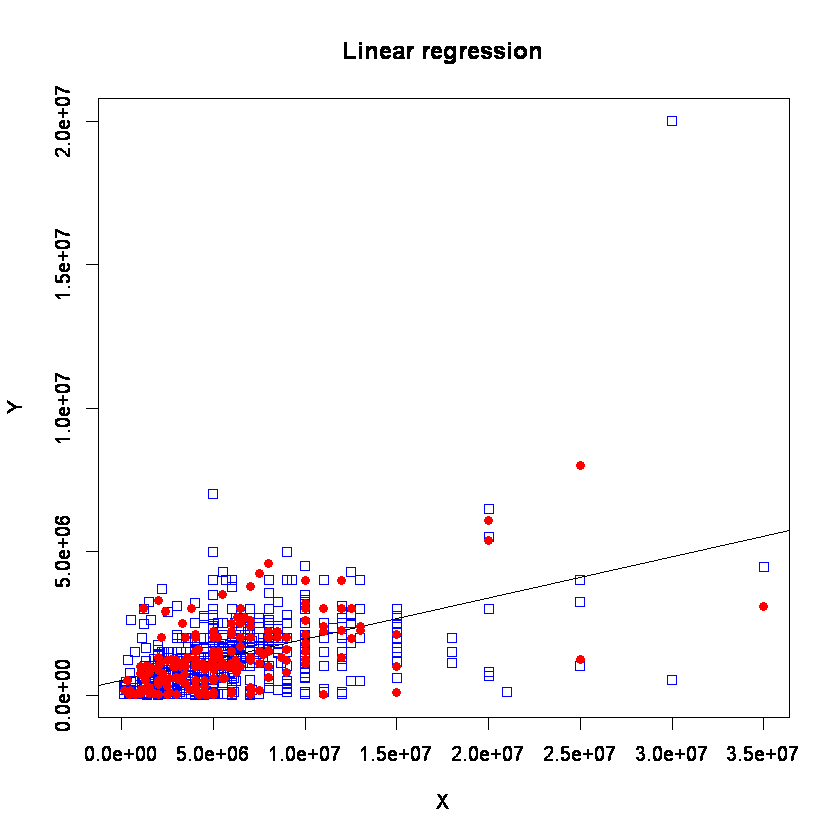

In [18]:

  #perform DBSCAN
  DBS<-dbscan(cbind(D[,1],D[,2]), minPts=55 , eps=1000000)
  # to make full DBS change ^ to D
  
  #################3
  #plotting -------
 
  for(i in seq(1:length(trainingSetD[,1]-1))){
    color<-switch(DBS$cluster[i]+1,"red","green","yellow","blue","orange","purple","violet","black")
    plot(trainingSetD[i,1],trainingSetD[i,2],col="blue",type="p",pch=0,xlim=c(min(D[,1]),max(D[,1])),ylim=c(min(D[,2]),max(D[,2])),main="Linear regression", xlab="X", ylab="Y")
    par(new=TRUE)
    
    # same here to change to pure DBS
    
  }
  abline(model1)
  par(new=TRUE)
  
  y_hat<-matrix(nrow = 202, ncol = 1) # this vector is to store estimated (predicted) values
  error<-matrix(nrow = 202, ncol = 1) # this vector is to store relative error
  
  # let us check how our model perform on a validation set
  C=summary(model1)$coefficients # extract coefficients of the model 1
  for (i in seq(along=validationSetD[,2]-1)){
    y_hat[i]=C[2,1]*validationSetD[i,2]+C[1,1] # compute estimate
    error[i]=(validationSetD[i,1]-y_hat[i])/validationSetD[i,1] # compute relative error
  }
  
  #plot Validation points
  plot(validationSetD[,1],validationSetD[,2],col="red",type="p",pch=16,xlim=c(min(D[,1]),max(D[,1])),ylim=c(min(D[,2]),max(D[,2])),main="Linear regression", xlab="X", ylab="Y")
  par(new=TRUE)
  #####################33
  
  # Check which clustering is the best
  # Analize each cluster separately and look for any relations
  # 
  DBSCAN_clustered<-DBS$cluster
  #save(C, correlation_mat, standard_deviation, y_hat, error, DBSCAN_clustered, file="F:/Google Drive/TUT/Data Mining/Home Assignement/3rd ex/Ex3_160412IV_16.RData")
  

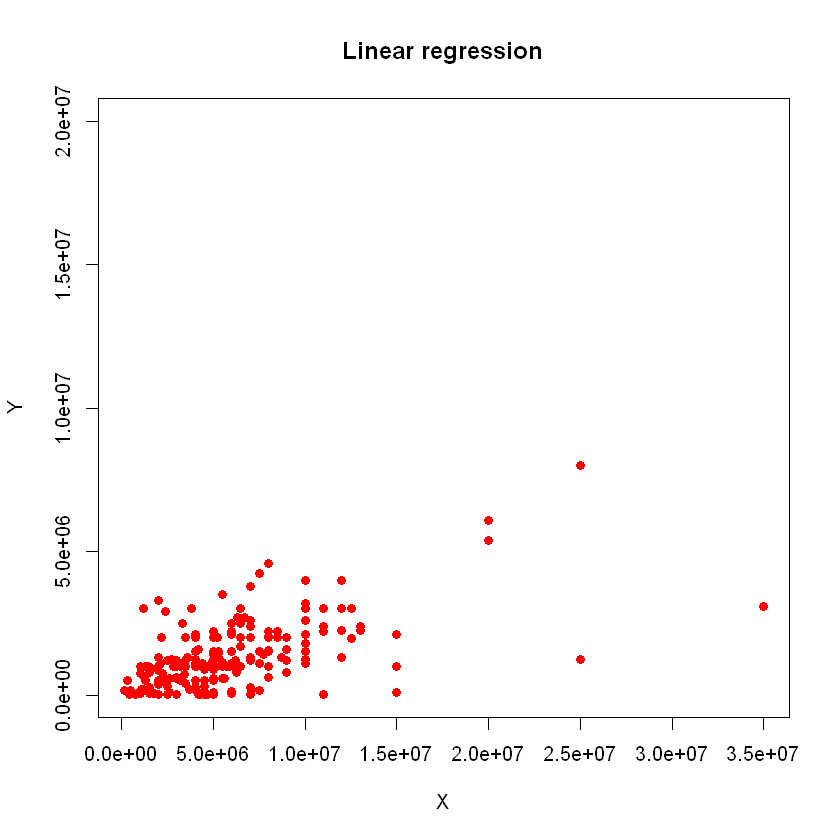